In [1]:
import random
from itertools import count
import time
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
import seaborn as sns

x_values = []
y_values = []
z_values = []
q_values = []
counter = 0
index = count()

# Create figure

df = pd.read_csv('avocado_updated.csv')
df2 = pd.read_csv('avocado.csv')
df.head()
df = df.drop(['Unnamed: 0'], axis=1)

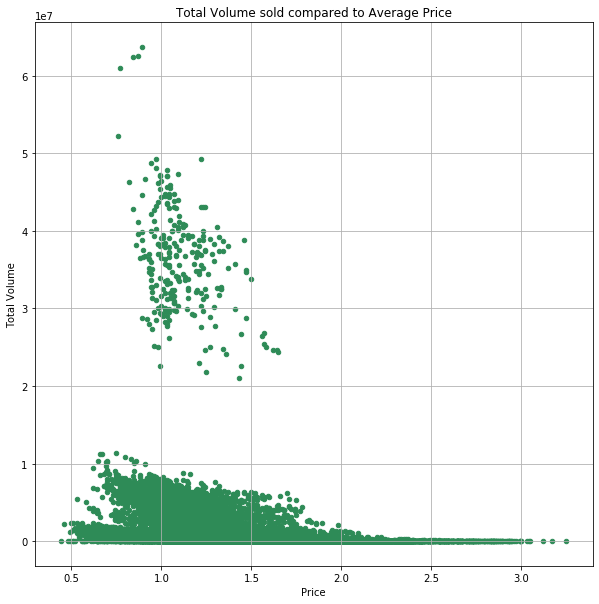

In [2]:
df.plot(kind="scatter",x="Price",y="Total Volume",color="seagreen",grid=True,linestyle="-",figsize=(10,10))
plt.title("Total Volume sold compared to Average Price")
plt.show()

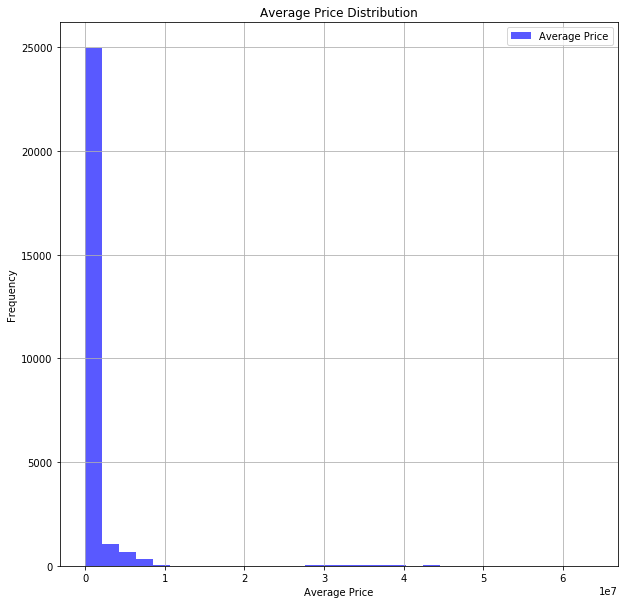

In [3]:
df["Total Volume"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price",figsize=(10,10))
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

In [4]:
df.describe()

,Price,Total Volume,Small Avocado,Large Avocado,XLarge Avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,Year
count,27323.000000,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,27323.000000,27323.000000
mean,1.400632,9.135469e+05,2.953187e+05,2.901059e+05,2.215868e+04,3.058740e+05,2.186982e+05,8.202537e+04,5150.387571,2016.956593
std,0.385439,3.702672e+06,1.273010e+06,1.187227e+06,1.031329e+05,1.274851e+06,8.881292e+05,3.917356e+05,30719.207766,1.406539
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.361412e+04,7.964250e+02,2.922980e+03,0.000000e+00,7.703605e+03,5.283050e+03,2.773700e+02,0.000000,2016.000000
50%,1.370000,1.198654e+05,1.003785e+04,2.568849e+04,1.926900e+02,4.775039e+04,3.223150e+04,4.312490e+03,0.000000,2017.000000
75%,1.640000,4.747205e+05,1.133179e+05,1.454464e+05,5.898300e+03,1.461021e+05,1.048424e+05,3.268494e+04,450.665000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,8.378356e+06,844929.830000,2019.000000


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['m'] = df['Date'].dt.month
df.head()

df2['Date'] = pd.to_datetime(df2['Date'])
df2['m'] = df2['Date'].dt.month


In [6]:
df = df.assign(m=df['Date'])
df['m'] = df['Date'].dt.month
df2 = df2.assign(m=df2['Date'])
df2['m'] = df2['Date'].dt.month

In [7]:
import calendar
df['m'] = df['m'].apply(lambda x: calendar.month_abbr[x])
df.head()
df2['m'] = df2['m'].apply(lambda x: calendar.month_abbr[x])

In [8]:
start_date = "2019-1-1"
end_date = "2019-1-31"

after_start_date = df2["Date"] >= start_date
before_end_date = df2["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df2.loc[between_two_dates]

start_date = "2018-2-1"
end_date = "2018-2-28"

after_start_date = df2["Date"] >= start_date
before_end_date = df2["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates2 = df2.loc[between_two_dates]
print(filtered_dates2)
start_date = "2017-3-1"
end_date = "2017-3-30"

after_start_date = df2["Date"] >= start_date
before_end_date = df2["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates3 = df2.loc[between_two_dates]
print(filtered_dates3)
start_date = "2016-4-1"
end_date = "2016-4-30"

after_start_date = df2["Date"] >= start_date
before_end_date = df2["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates4 = df2.loc[between_two_dates]
print(filtered_dates4)

            Date  AveragePrice  Total Volume       4046       4225     4770  \
161   2018-02-04          1.03     216738.47    7625.65  195725.06   143.53   
162   2018-02-11          1.45     121804.36    8183.48   95548.47    61.00   
163   2018-02-18          1.43      85630.24    5499.73   61661.76    75.00   
164   2018-02-25          1.28     104278.89   10368.77   59723.32    48.00   
414   2018-02-04          0.86     957792.07  474887.68   55158.13  1755.05   
...          ...           ...           ...        ...        ...      ...   
26982 2018-02-25          1.49     301985.61   34200.18   49139.34    85.58   
27180 2018-02-04          1.63      17074.83    2046.96    1529.20     0.00   
27181 2018-02-11          1.57      15986.17    1924.28    1368.32     0.00   
27182 2018-02-18          1.56      17597.12    1892.05    1928.36     0.00   
27183 2018-02-25          1.57      18421.24    1974.26    2482.65     0.00   

       Total Bags  Small Bags  Large Bags  XLarge B

In [9]:
dfyears1 = df2.copy()
dfyears2 = df2.copy()
dfyears3 = df2.copy()
dfyears4 = df2.copy()
concatenated = pd.concat([dfyears1.assign(dataset='filtered_dates'), dfyears2.assign(dataset='filtered_dates2'), dfyears3.assign(dataset='filtered_dates3'), dfyears4.assign(dataset='filtered_dates4')])
concatenated.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,m,dataset
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Jan,filtered_dates
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,Jan,filtered_dates
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,Jan,filtered_dates
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,Jan,filtered_dates
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,Feb,filtered_dates


In [10]:
organic = df2["type"] == "organic"
conv = df2["type"] == "conventional"
combo = df2.copy()
concat = pd.concat([combo.assign(dataset="organic"), combo.assign(dataset="conv")])


In [11]:
concat['year'] = pd.DatetimeIndex(concat['Date']).year

In [29]:
concat.dtypes
concat.astype({'Total Volume': 'int64'}).dtypes
concat.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,m,dataset
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Jan,organic
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,Jan,organic
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,Jan,organic
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,Jan,organic
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,Feb,organic


In [ ]:
sns.factorplot('Total Volume','AveragePrice',data=concat,
                   hue='year',
                   height=13,
                   aspect=0.8,
                   palette='coolwarm',
                   join=False,
              )
#ax.set(xlabel='', ylabel='')
plt.savefig("price_per_year_per_region.jpeg", bbox_inches="tight");


In [ ]:
Small_Avocado = df2["4046"]
Large_Avocado = df2["4225"]
XL_Avocado = df2["4770"]
Total_Bags = df2["Total Bags"]


combo = df2.copy()
concat2 = pd.concat([combo.assign(dataset="Small Avocado"), combo.assign(dataset="Large Avocado"), combo.assign(dataset="XL Avocado")
                    , combo.assign(dataset="Total_Bags")])
concat2.head()

In [ ]:
plt.figure(figsize=(600,100))
sns.barplot(
 data=concat2,
 x="region",
 y="AveragePrice",
 hue = "dataset",
ci=None)
plt.xlabel("Price Comparison by Year of Conventional & Organic Avocados")
plt.ylabel("")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize= 10 
)
# everything specified below is optional
plt.show()
plt.savefig('trial.png')